## Data Insights (Part 2)

📑 **Objective** :
- Recommend which of these 1000 new customers should be targeted to drive the most value for the organisation using the existing 3 datasets (Customer demographic, customer address and transactions)

# **LOAD DATASET**
---

In [3]:
# import dataset
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
# read dataset
data_newcust = pd.read_csv('NewCustomerList.csv')
data_newcust.sample(3)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
770,Juliann,Siemantel,Female,86,1947-12-15,Librarian,Entertainment,Mass Customer,N,No,...,VIC,Australia,8.0,1.02,1.0200,1.2750,1.083750,#REF!,760,0.6375
835,Porty,Hansed,U,88,NaN,General Manager,IT,Mass Customer,N,No,...,NSW,Australia,11.0,0.76,0.7600,0.9500,0.807500,#REF!,832,0.5750
207,Jeanne,Darte,Female,70,1955-08-18,NaN,NaN,Mass Customer,N,Yes,...,NSW,Australia,7.0,0.85,1.0625,1.0625,0.903125,#REF!,206,1.1375


In [5]:
data_newcust.head(10)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6.0,0.71,0.8875,1.109375,0.942969,#REF!,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11.0,0.41,0.4100,0.512500,0.435625,#REF!,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5.0,0.79,0.7900,0.790000,0.790000,#REF!,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1.0,0.87,1.0875,1.087500,1.087500,#REF!,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9.0,1.04,1.0400,1.300000,1.300000,#REF!,4,1.703125
5,Druci,Brandli,Female,39,1951-04-29,Assistant Media Planner,Entertainment,High Net Worth,N,Yes,...,QLD,Australia,7.0,0.78,0.9750,0.975000,0.975000,#REF!,6,1.671875
6,Rutledge,Hallt,Male,23,1976-10-06,Compensation Analyst,Financial Services,Mass Customer,N,No,...,NSW,Australia,7.0,0.56,0.5600,0.560000,0.476000,#REF!,6,1.671875
7,Nancie,Vian,Female,74,1972-12-27,Human Resources Assistant II,Retail,Mass Customer,N,Yes,...,QLD,Australia,5.0,0.58,0.7250,0.725000,0.616250,#REF!,8,1.656250
8,Duff,Karlowicz,Male,50,1972-04-28,Speech Pathologist,Manufacturing,Mass Customer,N,Yes,...,NSW,Australia,10.0,1.07,1.3375,1.671875,1.421094,#REF!,8,1.656250
9,Barthel,Docket,Male,72,1985-08-02,Accounting Assistant IV,IT,Mass Customer,N,Yes,...,QLD,Australia,5.0,0.86,1.0750,1.075000,0.913750,#REF!,10,1.640625


# **OVERVIEW DATASET**
---

In [6]:
# view the dataset summary.
data_newcust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

From the summary results, it can be seen that the dataset has missing values and columns that are unknown or irrelevant.

In [7]:
# Checking unique value from each columns
for col in data_newcust.columns:
    print("{} have {} unique values: {}".format(col, data_newcust[col].nunique(), data_newcust[col].dtypes))
    if data_newcust[col].dtypes == 'int64' or data_newcust[col].dtypes == 'float' or data_newcust[col].dtypes == 'object':
        print("{} values: {}".format(col, data_newcust[col].unique()))
        print('')

first_name have 940 unique values: object
first_name values: ['Chickie' 'Morly' 'Ardelis' 'Lucine' 'Melinda' 'Druci' 'Rutledge'
 'Nancie' 'Duff' 'Barthel' 'Rockwell' 'Wheeler' 'Olag' 'Melba' 'Mandie'
 'Dukie' 'Marcelia' 'Winnifred' 'Odilia' 'Karly' 'Teddie' 'Gaston' 'Otis'
 'Tabbatha' 'Brena' 'Rourke' 'Dyane' 'Claudine' 'Blinnie' 'Rhona'
 'Sharron' 'Brien' 'Sybilla' 'Mikel' 'Maisie' 'Arleen' 'Farlie' 'Mitchell'
 'Garik' 'Antonin' 'Vinny' 'Colene' 'Neile' 'Corinna' 'Brooke' 'Gipsy'
 'Sheena' 'Jobina' 'Gale' 'Thaxter' 'Heinrick' 'Taylor' 'Griswold'
 'Odessa' 'Lavena' 'Martelle' 'Briant' 'Marylou' 'Whittaker' 'Normy'
 'Lorrie' 'Jedediah' 'Kaine' 'Loise' 'Cristen' 'Dorothy' 'Rosmunda'
 'Rozamond' 'Gunner' 'Vivienne' 'Sherilyn' 'Bessie' 'Kevina' 'Yancy'
 'Mabelle' 'Hasheem' 'Tobias' 'Glennis' 'Chanda' 'Katheryn' 'Sumner'
 'Valerie' 'Esther' 'Gardie' 'Sean' 'Pietra' 'Marysa' 'Kahaleel' 'Ossie'
 'Sid' 'Ludovico' 'Patricia' 'Andromache' 'Levy' 'Nobe' 'Jehu' 'Symon'
 'Karlik' 'Bengt' 'Evangelin

From observing this summary data, we decided to perform data cleaning first. Our data-cleaning strategies include:
1. We will drop columns that have irrelevant values, namely Unnamed: 16, Unnamed: 17, Unnamed: 18, Unnamed: 19, Unnamed: 20
2. Next, we will fill the last_name column with the first_name value.
3. Then we will delete the remaining records that have missing values.
4. Last, convert the DOB column into age_class.

# **CLEANING DATASET**
---

In [8]:
# copy dataset for backup
data_newcust1 = data_newcust.copy()

## **1. Dropping Columns**

In [9]:
data_newcust1.drop(columns = ['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], inplace=True)

In [10]:
data_newcust1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

## **2. Filling Columns Last Name**

In [11]:
# filling nan in last name with first name
data_newcust1['last_name'].fillna(data_newcust1['first_name'], inplace=True)

In [12]:
data_newcust1[['first_name', 'last_name']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   first_name  1000 non-null   object
 1   last_name   1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


## **3. Delete Missing Values**

In [13]:
# checking missing values
data_newcust1.isna().sum()

first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [14]:
data_newcust1.dropna(inplace=True)

In [15]:
data_newcust1.isna().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
dtype: int64

## **4. Converting DOB into Age Class**

In [16]:
# corvert to datetime
data_newcust1['DOB'] = data_newcust1['DOB'].astype('datetime64[ns]')

In [17]:
# create function tu calculate age
from datetime import date
def calculate_age(birthdate):
    today = date.today()
    age = today.year-birthdate.year-((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

# fit into dataframe
data_newcust1['age']=data_newcust1['DOB'].apply(calculate_age)
data_newcust1['age_class'] = (round(data_newcust1['age']/ 10) * 10).astype(int)
data_newcust1.drop(columns=['age'], inplace=True)

In [18]:
data_newcust1.sample(3)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age_class
601,Anson,Dearnaly,Male,68,1997-06-29,Data Coordiator,Health,Affluent Customer,N,Yes,11,6060 Veith Crossing,2103,NSW,Australia,11.0,602,0.773500,20
295,Biddie,Gorce,Female,68,1988-01-30,Senior Financial Analyst,Financial Services,Mass Customer,N,Yes,5,2116 Continental Terrace,2795,NSW,Australia,7.0,295,1.031250,30
860,Craggy,Happel,Male,37,1979-02-10,Marketing Manager,Manufacturing,High Net Worth,N,Yes,8,23 Del Sol Alley,3064,VIC,Australia,6.0,859,0.557813,40


In [19]:
data_newcust1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           735 non-null    object        
 1   last_name                            735 non-null    object        
 2   gender                               735 non-null    object        
 3   past_3_years_bike_related_purchases  735 non-null    int64         
 4   DOB                                  735 non-null    datetime64[ns]
 5   job_title                            735 non-null    object        
 6   job_industry_category                735 non-null    object        
 7   wealth_segment                       735 non-null    object        
 8   deceased_indicator                   735 non-null    object        
 9   owns_car                             735 non-null    object        
 10  tenure        

# **FILTERING DATASET**
---

In the previous analysis, there are several criteria for customers who are valuable and have the potential to generate profits for the company, such as :
- Aged in age_class 40 - 50.
- Work in manufacture, financial services, or health industry.
- Classified as mass customer.
- Live in New South Wales.
- Have property valuation at 7-10 range.

So we will do filtering based on these conditions.

In [35]:
customer_new = data_newcust1.copy()

In [36]:
# filtering
customer_new = customer_new.query('age_class in (40, 50) or job_industry_category in ("Manufacturing", "Financial Services", "Health") or wealth_segment == "Mass Customers" and state == "NSW" or (property_valuation >=7 and property_valuation <= 10)')

In [43]:
customer_new.reset_index(inplace=True)

In [44]:
customer_new = customer_new.sort_values(by='Rank')

In [45]:
customer_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 667
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   level_0                              668 non-null    int64         
 1   index                                668 non-null    int64         
 2   first_name                           668 non-null    object        
 3   last_name                            668 non-null    object        
 4   gender                               668 non-null    object        
 5   past_3_years_bike_related_purchases  668 non-null    int64         
 6   DOB                                  668 non-null    datetime64[ns]
 7   job_title                            668 non-null    object        
 8   job_industry_category                668 non-null    object        
 9   wealth_segment                       668 non-null    object        
 10  deceased_indic

Out of 100 customer data we get 668 of them who have the most valuable to the company.

In [48]:
# saving dataset
customer_new.to_csv('NewCustomerList_Targeted.csv', index=False)

# **EDA**
---

### **Age Distribution**
---

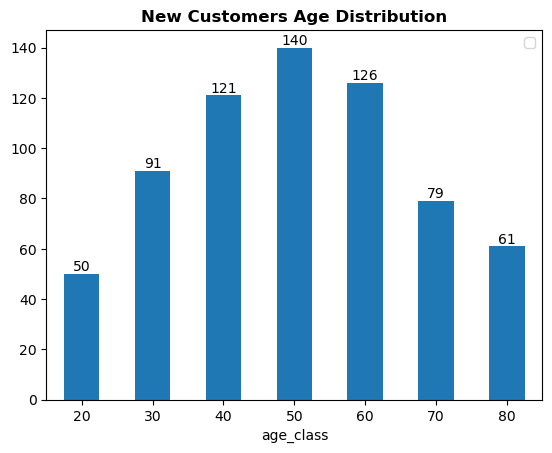

In [25]:
# calculating data
group = customer_new.groupby(['age_class'])['age_class'].count()
group = group.reset_index(name='count')

# creating visualization
x = group.plot(kind='bar', x='age_class', y='count')
plt.title('New Customers Age Distribution', fontweight='bold')
plt.xticks(rotation=360)
plt.legend('')

# showing label in bars
for bar in x.patches:
    x.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

### **Job Industry Distribution**
---

Text(0.5, 1.0, 'New Customer Job Industry Distributions')

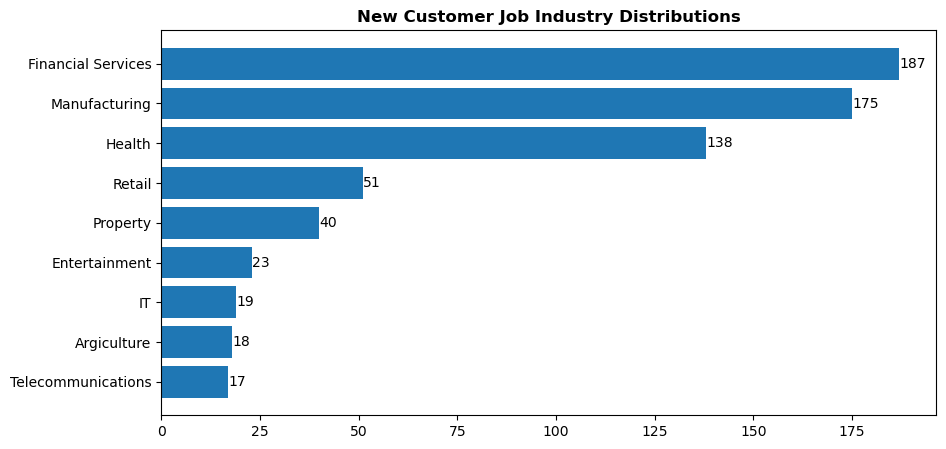

In [29]:
# calculating data
indust = customer_new['job_industry_category'].value_counts().reset_index()
indust.columns = ['job_industry', 'count']

# visualizing job industry
fig, ax = plt.subplots(figsize=(10,5))

indust_sort = indust.sort_values(by=['count']).reset_index(drop=True)
bars = plt.barh(y=indust_sort['job_industry'], width= indust_sort['count'])
plt.bar_label(ax.containers[0]) 
plt.title('New Customer Job Industry Distributions', fontweight='bold')


### **Wealth Segment Distribution**
---

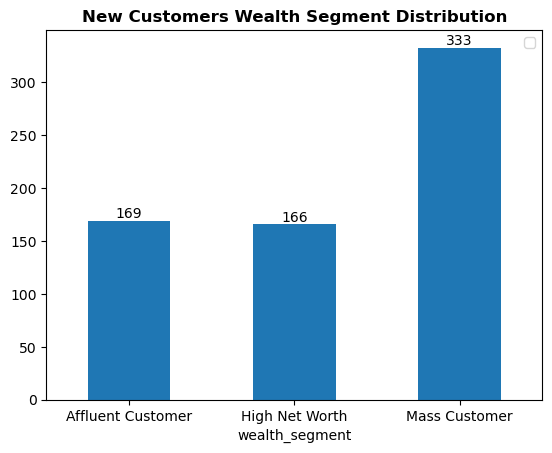

In [27]:
# calculating data
group = customer_new.groupby(['wealth_segment'])['wealth_segment'].count()
group = group.reset_index(name='count')

# creating visualization
x = group.plot(kind='bar', x='wealth_segment', y='count')
plt.title('New Customers Wealth Segment Distribution', fontweight='bold')
plt.xticks(rotation=360)
plt.legend('')

# showing label in bars
for bar in x.patches:
    x.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

### **State Distribution**
---

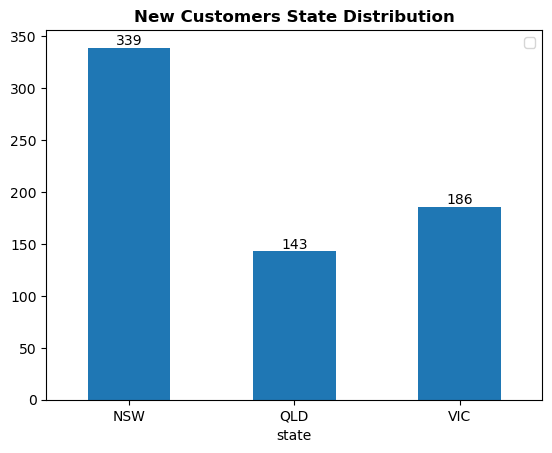

In [26]:
# calculating data
group = customer_new.groupby(['state'])['state'].count()
group = group.reset_index(name='count')

# creating visualization
x = group.plot(kind='bar', x='state', y='count')
plt.title('New Customers State Distribution', fontweight='bold')
plt.xticks(rotation=360)
plt.legend('')

# showing label in bars
for bar in x.patches:
    x.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')

### **Property Valuation Distribution**
---

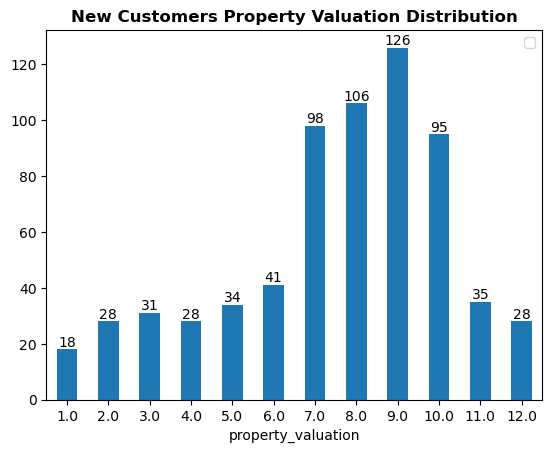

In [28]:
# calculating data
group = customer_new.groupby(['property_valuation'])['property_valuation'].count()
group = group.reset_index(name='count')

# creating visualization
x = group.plot(kind='bar', x='property_valuation', y='count')
plt.title('New Customers Property Valuation Distribution', fontweight='bold')
plt.xticks(rotation=360)
plt.legend('')

# showing label in bars
for bar in x.patches:
    x.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')